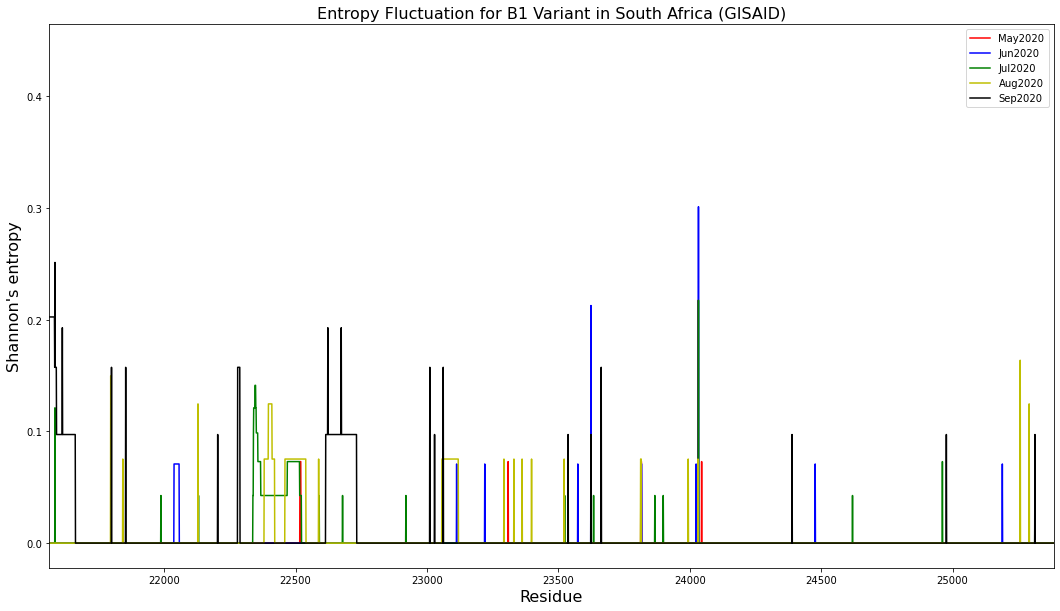

In [2]:
#importing the relevant packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
from Bio import AlignIO
import warnings
warnings.filterwarnings("ignore")

#function to calculate the Shannon Entropy of a MSA
# H = -sum[p(x).log2(px)]

def shannon_entropy(list_input):
    unique_aa = set(list_input)   
    M = len(list_input)
    entropy_list = []
    # Number of residues in column
    for aa in unique_aa:
        n_i = list_input.count(aa)                                           
        P_i = n_i/float(M)                                
        entropy_i = P_i*(math.log(P_i,10))
        entropy_list.append(entropy_i)
    sh_entropy = -(sum(entropy_list))
    #print(sh_entropy)
    return sh_entropy

#importing the MSA file
#importing the clustal file
align_clustal1 = AlignIO.read("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/B1/may2020_clustal.aln","clustal")
align_clustal2 = AlignIO.read("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/B1/jun2020_clustal.aln", "clustal")
align_clustal3 = AlignIO.read("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/B1/jul2020_clustal.aln", "clustal")
align_clustal4 = AlignIO.read("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/B1/aug2020_clustal.aln","clustal")
align_clustal5 = AlignIO.read("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/B1/sep2020_clustal.aln","clustal")

def shannon_entropy_list_msa(alignment_file):
    shannon_entropy_list = []
    for col_no in range(len(list(alignment_file[0]))):
        list_input = list(alignment_file[:, col_no])
        shannon_entropy_list.append(shannon_entropy(list_input))
    return shannon_entropy_list

clustal_omega1 = shannon_entropy_list_msa(align_clustal1)
clustal_omega2 = shannon_entropy_list_msa(align_clustal2)
clustal_omega3 = shannon_entropy_list_msa(align_clustal3)
clustal_omega4 = shannon_entropy_list_msa(align_clustal4)
clustal_omega5 = shannon_entropy_list_msa(align_clustal5)

#print(clustal_omega1)
# Plotting the data
plt.figure(figsize=(18,10))
plt.plot(clustal_omega1, 'r' ,label="May2020")
plt.plot(clustal_omega2, 'b', label="Jun2020")
plt.plot(clustal_omega3, 'g', label="Jul2020")
plt.plot(clustal_omega4, 'y', label="Aug2020")
plt.plot(clustal_omega5, 'k' ,label="Sep2020")
plt.xlabel('Residue', fontsize=16)
plt.ylabel("Shannon's entropy", fontsize=16)
plt.legend()
plt.xlim(21563,25384)
plt.title("Entropy Fluctuation for B1 Variant in South Africa (GISAID)", fontsize=16)
plt.show()

In [6]:
import csv
list1 = np.arange(21563,25385)
list2 = clustal_omega5[21563:25385]
with open('/home/satyam/Documents/Entropy_Comparison/GISAID/foo.csv', "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        writer.writerow(['A', 'B'])
        for i in range(len(list1)):
            writer.writerow([list1[i],list2[i]])

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

df = pd.read_csv("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/B1/Response/b1_response_data.csv")
df.head()

,pos,may,jun,jul,aug,sep,mean,d1,d2,d3,d4,d5,s1,s2,s3,s4,s5,num,final
0,21563,0.0,0.0,0.0,0.0,0.202381,0.040476,-0.040476,-0.040476,-0.040476,-0.040476,0.161905,0.001638,0.001638,0.001638,0.001638,0.026213,0.006553,0.161904724695357
1,21564,0.0,0.0,0.0,0.0,0.202381,0.040476,-0.040476,-0.040476,-0.040476,-0.040476,0.161905,0.001638,0.001638,0.001638,0.001638,0.026213,0.006553,0.161904724695357
2,21565,0.0,0.0,0.0,0.0,0.202381,0.040476,-0.040476,-0.040476,-0.040476,-0.040476,0.161905,0.001638,0.001638,0.001638,0.001638,0.026213,0.006553,0.161904724695357
3,21566,0.0,0.0,0.0,0.0,0.202381,0.040476,-0.040476,-0.040476,-0.040476,-0.040476,0.161905,0.001638,0.001638,0.001638,0.001638,0.026213,0.006553,0.161904724695357
4,21567,0.0,0.0,0.0,0.0,0.202381,0.040476,-0.040476,-0.040476,-0.040476,-0.040476,0.161905,0.001638,0.001638,0.001638,0.001638,0.026213,0.006553,0.161904724695357


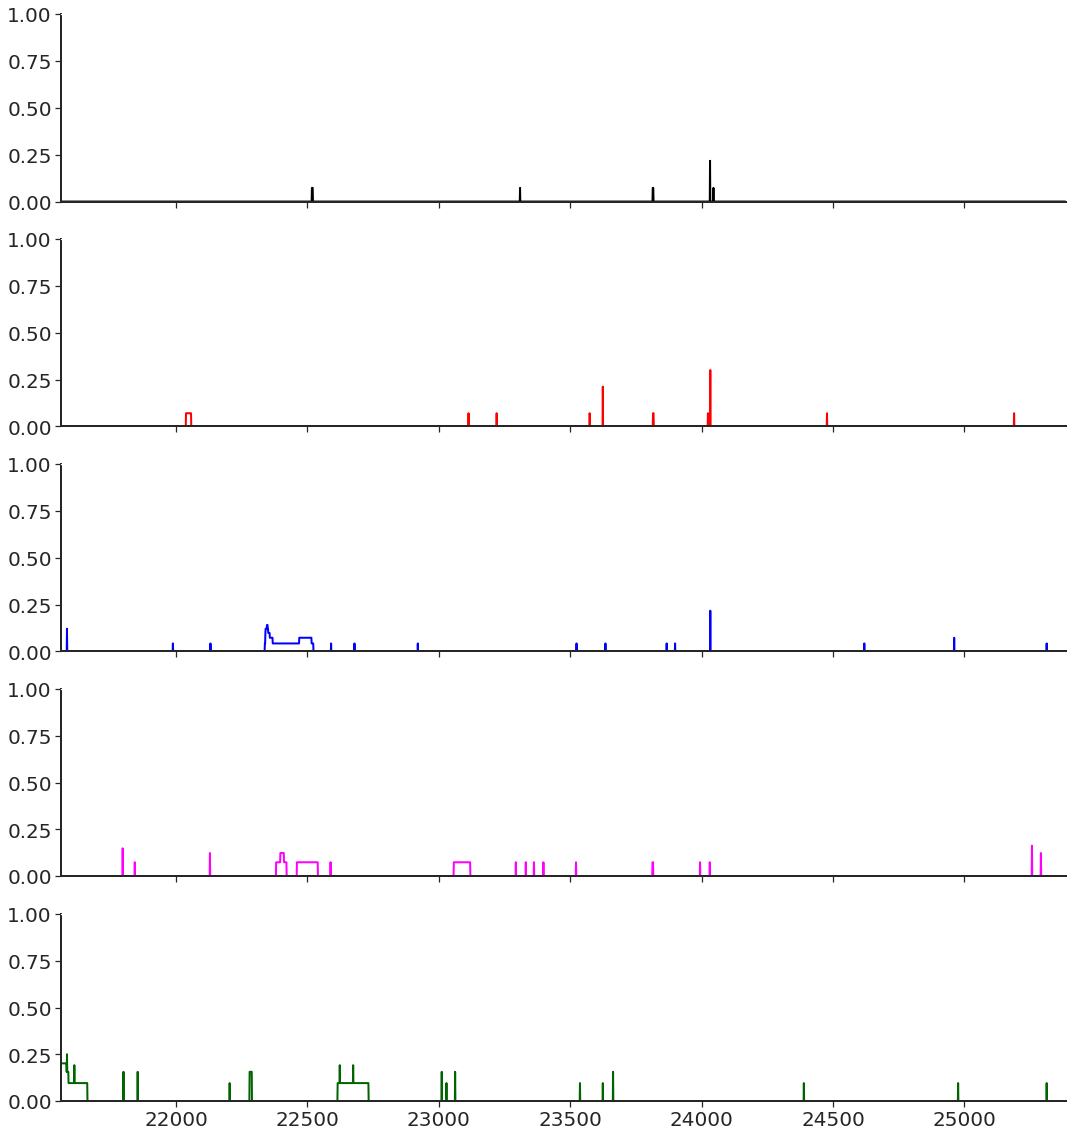

In [16]:
fig, axs = plt.subplots(5, sharex=True, sharey=True, figsize=(18,20))
axs[0].spines['right'].set_color(None)
axs[0].spines['top'].set_color(None)
axs[0].spines['left'].set_linewidth(2)
axs[0].spines['bottom'].set_linewidth(2)
axs[1].spines['right'].set_color(None)
axs[1].spines['top'].set_color(None)
axs[1].spines['left'].set_linewidth(2)
axs[1].spines['bottom'].set_linewidth(2)
axs[2].spines['right'].set_color(None)
axs[2].spines['top'].set_color(None)
axs[2].spines['left'].set_linewidth(2)
axs[2].spines['bottom'].set_linewidth(2)
axs[3].spines['right'].set_color(None)
axs[3].spines['top'].set_color(None)
axs[3].spines['left'].set_linewidth(2)
axs[3].spines['bottom'].set_linewidth(2)
axs[4].spines['right'].set_color(None)
axs[4].spines['top'].set_color(None)
axs[4].spines['left'].set_linewidth(2)
axs[4].spines['bottom'].set_linewidth(2)
axs[0].plot(df["pos"], df["may"], 'black', linewidth=2.0)
axs[1].plot(df["pos"], df["jun"], 'red', linewidth=2.0)
axs[2].plot(df["pos"], df["jul"], 'blue', linewidth=2.0)
axs[3].plot(df["pos"], df["aug"], 'magenta', linewidth=2.0)
axs[4].plot(df["pos"], df["sep"], 'darkgreen', linewidth=2.0)
axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)
axs[3].tick_params(axis='y', labelsize=20)
axs[4].tick_params(axis='y', labelsize=20)
axs[4].tick_params(axis='x', labelsize=20)
plt.ylim(0,1)
plt.xlim(21563, 25385)
plt.savefig("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/B1/Response/b1_fuctuation.png", dpi=300)
plt.show()

In [18]:
df2 = pd.read_csv("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/B1/Response/b1_final_fluctuation_sa.csv")
df2.head()

,pos,final
0,21563,0.161905
1,21564,0.161905
2,21565,0.161905
3,21566,0.161905
4,21567,0.161905


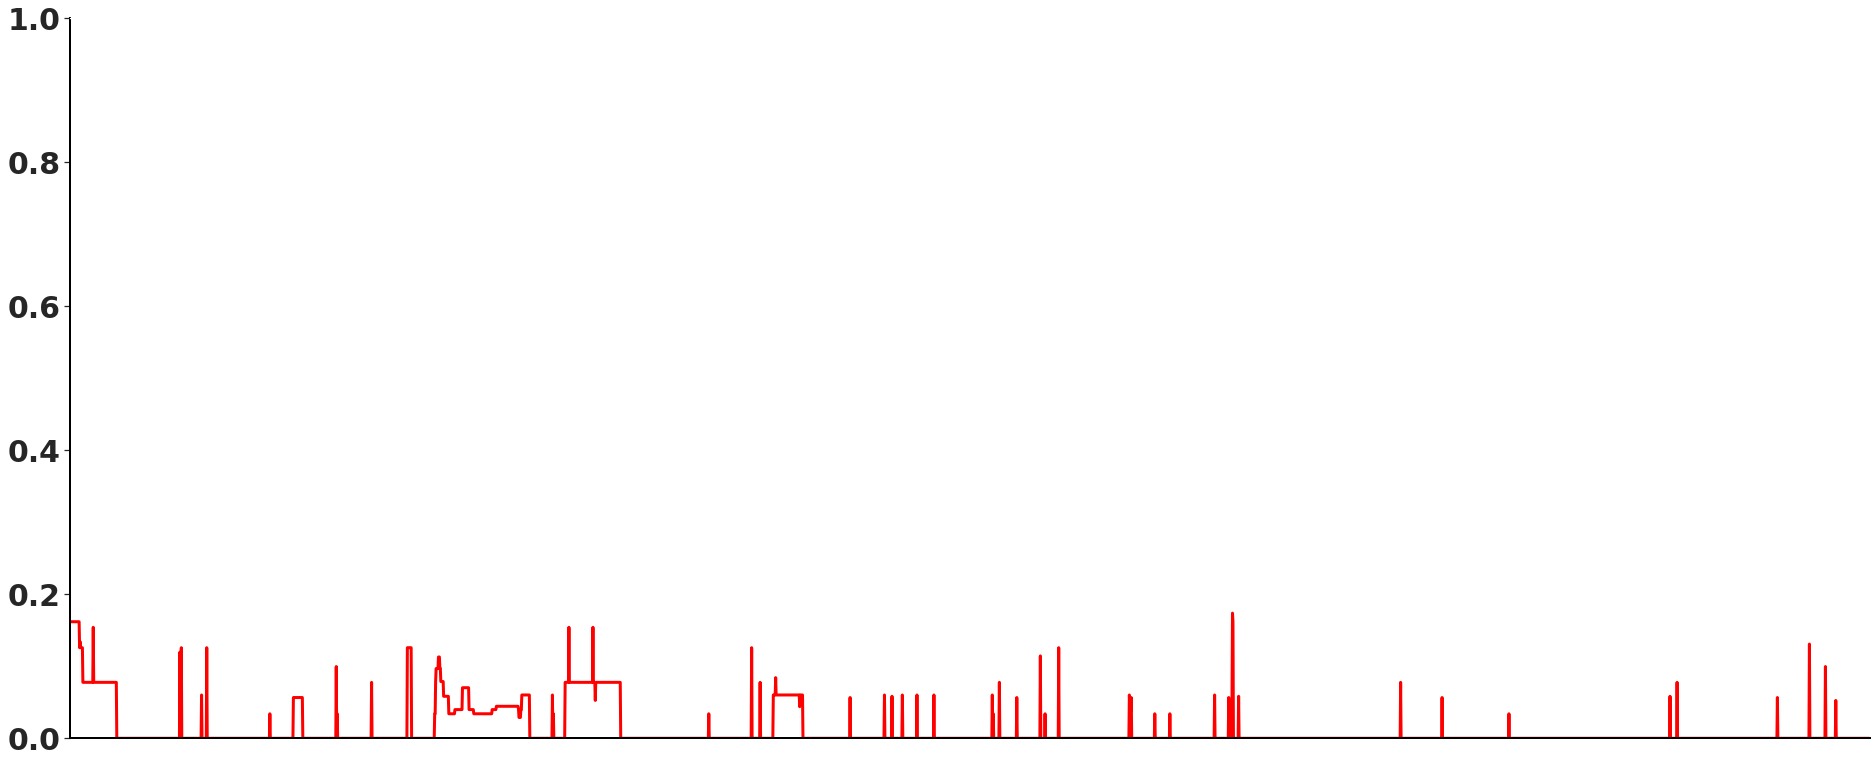

In [20]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
ax.plot(df2["pos"],df2["final"], 'red', linewidth=3.0)
ax.set_xlim(21563,25385)
ax.set_ylim(0,1)
plt.xticks(fontsize=30, weight="bold")
plt.yticks(fontsize=30, weight="bold")
plt.xticks([])
plt.savefig("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/B1/Response/b1_final_fluctuation.png", bbox_inches='tight',dpi=300)
plt.show()